# Task 1: Introduction

In [50]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Task 2: Dataset

Real estate agent table:

|Area|Distance|Price|
|---|---|---|
|70|3|21200|
|50|1|22010|
|120|9|24305|
|100|2|31500|

You can write the relationship with a 2-variable linear equation:

$
\begin{equation}
y = b + w_1.x_1 + w_2.x_2
\end{equation}
$

In a vector form:

$
\begin{equation}
y = b + (w_1 w_2).\binom{x_1}{x_2}
\end{equation}
$

Where
$
\begin{equation}
W = (w_1 w_2)
\end{equation}
$
and
$
\begin{equation}
X = \binom{x_1}{x_2}
\end{equation}
$

In [51]:
def generate_examples(num=1000):
    W = [1.0,-3.0]
    b = 1.0
    
    W = np.reshape(W,(2,1))
    X = np.random.randn(num,2)
    
    y = b + np.dot(X,W)
    
    y = np.reshape(y,(num,1))
    
    return X,y

In [52]:
X, y = generate_examples()

In [53]:
print(X.shape,Y.shape,)

(1000, 2) (1000, 1)


In [54]:
X[0],y[0]

(array([-1.3810912 , -0.31282809]), array([0.55739308]))

# Task 3: Initialize Parameters

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

The objective of the gradient descent algorithm is to minimize this loss value.

Gradient Descent Objective is to 
$
\begin{equation}
min(J)
\end{equation}
$

In [55]:
class Model:
    def __init__(self,num_features):
        self.num_features = num_features
        self.W = np.random.randn(num_features,1)
        self.b = np.random.randn()

In [56]:
model = Model(2)
model.W,model.b

(array([[1.00688412],
        [1.42550056]]), -3.308551789920813)

# Task 4: Forward Pass

The gradient descent algorithm can be simplified in 4 steps:

1. Get predictions y_hat for X with current values of W and b.
2. Compute the loss between y and y_hat
3. Find gradients of the loss with respect to parameters W and b
4. Update the values of W and b by subtracting the gradient values obtained in the previous step

Let's simplify our linear equation a bit more for an example:
$
\begin{equation}
y = wx
\end{equation}
$

Let's plot J as a function of w

![Loss vs Param](JvsW.png)

The gradients of loss with respect to w:

\begin{equation}
\frac{dJ}{dw} = \frac{\delta{J}}{\delta{w}} = \lim_{\epsilon \to 0} \frac{J(w + \epsilon) - J(w)}{\epsilon}
\end{equation}

In [57]:
class Model(Model):
    def forward_pass(self,X):
        y_hat = self.b + np.dot(X,self.W)
        
        return y_hat

In [58]:
y_hat = Model(2).forward_pass(X)
y_hat.shape

(1000, 1)

# Task 5: Compute Loss

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

In [59]:
class Model(Model):
    def compute_loss(self,y_hat,y_true):
        loss = np.sum(np.square(y_hat-y_true))/(2*y_hat.shape[0])
        
        return loss

In [60]:
model = Model(2)
y_hat = model.forward_pass(X)
loss = model.compute_loss(y_hat,y)

In [61]:
loss

5.461517034072639

# Task 6: Backward Pass

The gradient of loss with respect to bias can be calculated with:

$
\begin{equation}
\frac{dJ}{db} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)})
\end{equation}
$

$
\begin{equation}
\frac{dJ}{dW_j} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)}).x_j^{(i)}
\end{equation}
$

In [62]:
class Model(Model):
    def backward_pass(self,X,y_true,y_hat):
        m = y_true.shape[0]
        db = (1/m)*np.sum(y_hat - y_true)
        dW = (1/m)*np.sum(np.dot(np.transpose(y_hat - y_true), X),axis=0)
        return dW, db

In [66]:
model = Model(2)
X, y = generate_examples()
y_hat = model.forward_pass(X)
dW, db = model.backward_pass(X,y,y_hat)

In [67]:
print(dW, db)

[-3.82114706  2.86803312] 1.1969776872032507


# Task 7: Update Parameters

In [68]:
class Model(Model):
    def update_params(self, dW, db, lr):
        self.W = self.W - lr* np.reshape(dW,(self.num_features,1))
        self.b = self.b -db

# Task 8: Training Loop

In [75]:
class Model(Model):
    def train(self, x_train, y_train, iterations, lr):
        losses = []
        for i in range (0, iterations):
            y_hat = self.forward_pass(x_train)
            loss = self.compute_loss(y_hat,y_train)
            dW, db = self.backward_pass(x_train, y_train, y_hat)
            self.update_params(dW,db,lr)
            losses.append(loss)
            if i%int(iterations/10):
                print('Iter: {}, loss: {:.4f}'.format(i,loss))
                
        return losses

In [76]:
model = Model(2)

In [77]:
x_train, y_train = generate_examples()

In [78]:
losses = model.train(x_train, y_train, 1000, 3e-3)

Iter: 1, loss: 9.4020
Iter: 2, loss: 9.3465
Iter: 3, loss: 9.2914
Iter: 4, loss: 9.2366
Iter: 5, loss: 9.1821
Iter: 6, loss: 9.1279
Iter: 7, loss: 9.0741
Iter: 8, loss: 9.0206
Iter: 9, loss: 8.9674
Iter: 10, loss: 8.9145
Iter: 11, loss: 8.8619
Iter: 12, loss: 8.8096
Iter: 13, loss: 8.7577
Iter: 14, loss: 8.7060
Iter: 15, loss: 8.6547
Iter: 16, loss: 8.6037
Iter: 17, loss: 8.5529
Iter: 18, loss: 8.5025
Iter: 19, loss: 8.4523
Iter: 20, loss: 8.4025
Iter: 21, loss: 8.3529
Iter: 22, loss: 8.3037
Iter: 23, loss: 8.2547
Iter: 24, loss: 8.2061
Iter: 25, loss: 8.1577
Iter: 26, loss: 8.1096
Iter: 27, loss: 8.0617
Iter: 28, loss: 8.0142
Iter: 29, loss: 7.9670
Iter: 30, loss: 7.9200
Iter: 31, loss: 7.8733
Iter: 32, loss: 7.8269
Iter: 33, loss: 7.7807
Iter: 34, loss: 7.7349
Iter: 35, loss: 7.6893
Iter: 36, loss: 7.6439
Iter: 37, loss: 7.5989
Iter: 38, loss: 7.5541
Iter: 39, loss: 7.5095
Iter: 40, loss: 7.4653
Iter: 41, loss: 7.4212
Iter: 42, loss: 7.3775
Iter: 43, loss: 7.3340
Iter: 44, loss: 7.29

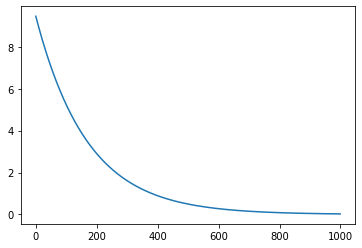

In [80]:
plt.plot(losses);

# Task 9: Predictions

In [85]:
model_untrained = Model(2)
x_test, y_test = generate_examples(500)
print(x_test.shape, y_test.shape)

(500, 2) (500, 1)


In [86]:
preds_untrained = model_untrained.forward_pass(x_test)
preds_trained = model.forward_pass(x_test)

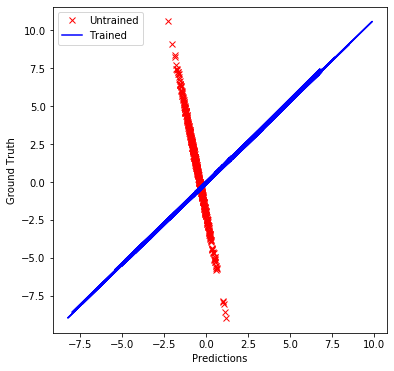

In [89]:
plt.figure(figsize=(6,6))
plt.plot(preds_untrained,y_test,'rx',label='Untrained');
plt.plot(preds_trained,y_test,'b',label='Trained');
plt.legend()
plt.xlabel('Predictions')
plt.ylabel('Ground Truth');